# Assignment 05

Nama : Daniel Christian Mandolang

NPM  : 2106630006

In [1]:
import pandas as pd
import heapq
import networkx as nx
import matplotlib.pyplot as plt
from typing import List

/var/folders/7_/d14yyjyn4vb2hkkrmxkh_fm80000gn/T/ipykernel_26383/2289769026.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
class Node:
    def __init__(self, id: int, name: str):
        self.id = id
        self.name = name
        self.neighbors = []
    
    def __lt__(self, other: 'Node'):
        return self.name < other.name

    @property
    def degree(self):
        return len(self.neighbors)

    def add_neighbor(self, node: 'Node'):
        self.neighbors.append(node)
        node.neighbors.append(self)

Extend Node class into DirectedNode that enables support for directed graphs.

In [4]:
class DirectedNode(Node):
    def __init__(self, id: int, name: str):
        super().__init__(id, name)
        self.in_neighbors = []
        self.out_neighbors = []

    def add_neighbor(self, node: 'DirectedNode'):
        self.out_neighbors.append(node)
        node.in_neighbors.append(self)

    @property
    def in_degree(self):
        return len(self.in_neighbors)

    @property
    def out_degree(self):
        return len(self.out_neighbors)

In [23]:
class Graph:
    MAX_NODE = 2000
    INFINITY = int(1e18)

    def __init__(self, csv_file: str = None, is_directed: bool = False):
        self.is_directed = is_directed
        self.name_to_node = {}
        self.nodes = []
        self.adjacency_matrix = [
            [0]*Graph.MAX_NODE for i in range(Graph.MAX_NODE)
        ]

        if csv_file:
            df = pd.read_csv(csv_file)
            for index, row in df.iterrows():
                node_1 = self.get_node(row['Node1'])
                node_2 = self.get_node(row['Node2'])
                self.add_edge(node_1, node_2, row['Weight'])
    
    def get_node(self, name: str) -> Node:
        if name not in self.name_to_node:
            if self.is_directed:
                new_node = DirectedNode(len(self.nodes), name)
            else:
                new_node = Node(len(self.nodes), name)
            self.name_to_node[name] = new_node
            self.nodes.append(new_node)
        return self.name_to_node[name]

    def add_edge(self, node_1: Node, node_2: Node, weight: int):
        node_1.add_neighbor(node_2)
        self.adjacency_matrix[node_1.id][node_2.id] = weight
        if not self.is_directed:
            self.adjacency_matrix[node_2.id][node_1.id] = weight

    def get_shortest_path(self, start: str) -> List[int]:
        try:
            start_node = self.name_to_node[start]
        except:
            raise KeyError('Start node not valid')

        dist = [Graph.INFINITY] * len(self.nodes)
        pq = []
        
        dist[start_node.id] = 0
        heapq.heappush(pq, [0, start_node])

        while len(pq) > 0:
            cur_dist, cur_node = heapq.heappop(pq)
            if dist[cur_node.id] != cur_dist:
                continue
            for nx_node in cur_node.out_neighbors:
                weight = self.adjacency_matrix[cur_node.id][nx_node.id]
                if dist[nx_node.id] > cur_dist + weight:
                    print(f"{cur_node.name} ke {nx_node.name}")
                    dist[nx_node.id] = cur_dist + weight
                    heapq.heappush(pq, [dist[nx_node.id], nx_node])

        return dist

    def visualize(self):
        G_nx = nx.DiGraph() if self.is_directed else nx.Graph()

        for node in self.nodes:
            G_nx.add_node(node.name)

            for neighbor in (node.out_neighbors if self.is_directed else node.neighbors):
                if not G_nx.has_edge(node.name, neighbor.name):
                    weight = self.adjacency_matrix[node.id][neighbor.id]
                    G_nx.add_edge(node.name, neighbor.name, weight=weight)

        pos = nx.spring_layout(G_nx)
        nx.draw(G_nx, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10)
        
        edge_labels = nx.get_edge_attributes(G_nx, 'weight')
        nx.draw_networkx_edge_labels(G_nx, pos, edge_labels=edge_labels)

        plt.show()

### 1

In [24]:
graph = Graph('/Users/danielcm585/Developer/data-mining/assignment/assignment05/graph.csv')

In [25]:
print(f"{'Node':10} {'Degree Centrality':20} {'Neighbors':100}")
for i in range(len(graph.nodes)):
    node = graph.nodes[i]
    print("{:10} {:<20} {:100}".format(
        node.name,
        node.degree,
        ', '.join([
            f"{neighbor.name}({graph.adjacency_matrix[node.id][neighbor.id]})"
            for neighbor in node.neighbors
        ])
    ))
    

Node       Degree Centrality    Neighbors                                                                                           
Ani        5                    Budi(3), Cici(2), Hendra(3), Joko(2), Kate(3)                                                       
Budi       5                    Ani(3), Cici(1), David(4), Joko(1), Kate(2)                                                         
Cici       6                    Ani(2), Budi(1), Eva(2), Gunawan(1), Hendra(1), Joko(3)                                             
David      8                    Budi(4), Eva(3), Gunawan(2), Hendra(4), Farhan(3), Joko(4), Kate(4), Lisa(4)                        
Eva        8                    Cici(2), David(3), Farhan(1), Hendra(1), Gunawan(2), Joko(2), Kate(2), Lisa(2)                      
Farhan     5                    Eva(1), Gunawan(2), David(3), Kate(1), Lisa(1)                                                      
Gunawan    8                    Farhan(2), Hendra(3), David(2), Cici(

### 2

In [26]:
graph = Graph(
    '/Users/danielcm585/Developer/data-mining/assignment/assignment05/graph.csv',
    is_directed=True
)

In [27]:
print(f"{'Node':10} {'In Degree Centrality':22} {'Out Degree Centrality':22}")
for i in range(len(graph.nodes)):
    node = graph.nodes[i]
    print("{:10} {:<22} {:<22}".format(
        node.name,
        node.in_degree,
        node.out_degree,
    ))
    

Node       In Degree Centrality   Out Degree Centrality 
Ani        0                      5                     
Budi       1                      4                     
Cici       3                      3                     
David      2                      6                     
Eva        3                      5                     
Farhan     1                      4                     
Gunawan    3                      5                     
Hendra     4                      3                     
Joko       7                      1                     
Kate       6                      1                     
Lisa       7                      0                     


### 3

In [28]:
dist = graph.get_shortest_path('Farhan')
print(f"{'Node':10} {'Shortest Path':16}")
for i in range(len(graph.nodes)):
    node = graph.nodes[i]
    print("{:10} {:<16}".format(
        node.name,
        dist[node.id] if dist[node.id] < Graph.INFINITY else "-",
    ))
    

Farhan ke Gunawan
Farhan ke David
Farhan ke Kate
Farhan ke Lisa
Gunawan ke Hendra
Gunawan ke Eva
Gunawan ke Joko
Hendra ke Cici
Node       Shortest Path   
Ani        -               
Budi       -               
Cici       6               
David      3               
Eva        4               
Farhan     0               
Gunawan    2               
Hendra     5               
Joko       5               
Kate       1               
Lisa       1               


### 4

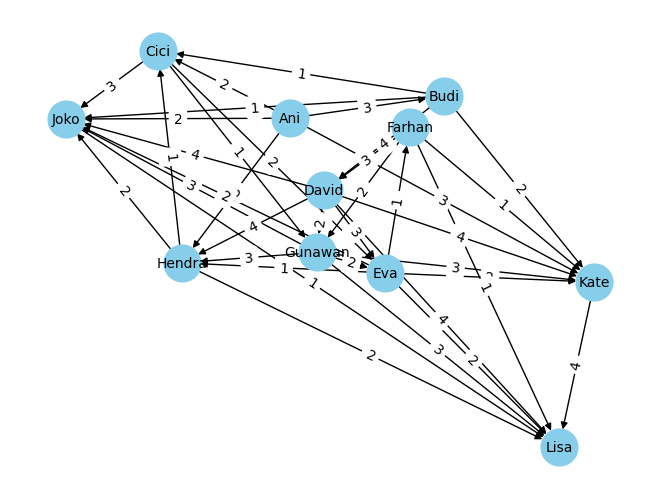

In [29]:
graph.visualize()

### 5

#### Graf 1

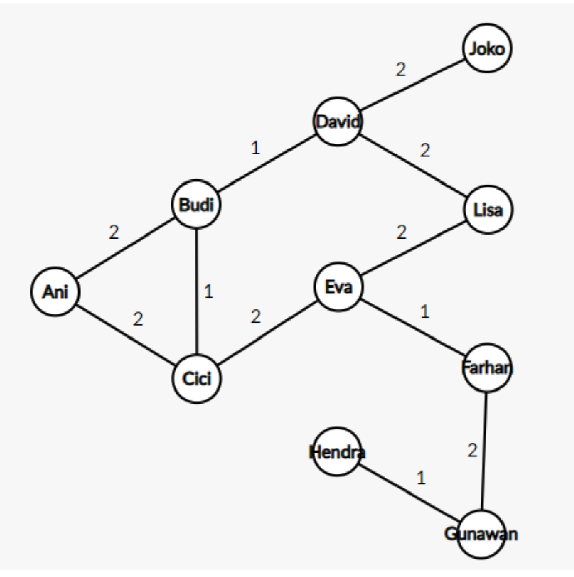


#### Graf 2

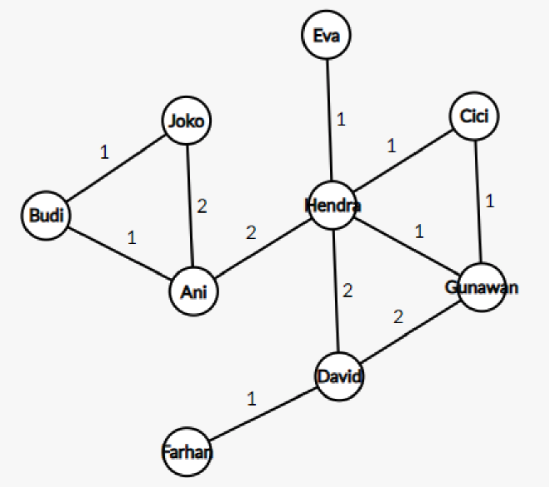

### Graf 3

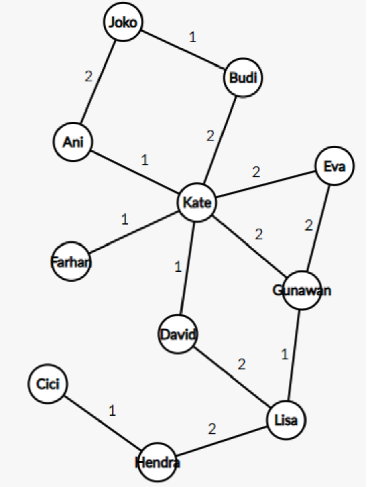

#### 5 Pola yang paling sering muncul
Kode yang digunakan: https://github.com/danielcm585/data-mining/blob/master/assignment/assignment05/no5.cpp

```
1. Pria --2-- Wanita              : 10 kali
2. Pria --1-- Wanita              : 10 kali
3. Pria --1-- Wanita —-2-— Pria   : 8 kali
4. Wanita --1-- Pria --2-- Wanita : 7 kali
5. Pria --2-- Wanita --2-- Pria   : 6 kali
6. Pria --1-- Pria --2-- Pria     : 6 kali
7. Pria --1-- Pria                : 6 kali 
```